## Data Exploration

Own notes: There is data leakage: Cannot use satisfaction score to predict churn - it is a result known after delivering service

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DATA/churn_data_full.csv')

In [3]:
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,39,29,18.91,NaN,NaN,54,Bradley,3334,One Year,United States,...,7,477.05,0,132.37,0.0,609.42,0,1,93426,0
1,75,22,33.48,NaN,NaN,54,Lakeshore,2455,Month-to-Month,United States,...,30,3181.80,0,1004.40,0.0,4186.20,0,1,93634,0
2,67,14,9.96,NaN,NaN,26,Lompoc,5011,Two Year,United States,...,71,7904.25,0,707.16,0.0,8611.41,0,1,93437,0
3,47,7,34.64,NaN,NaN,29,Echo Lake,2452,Month-to-Month,United States,...,9,593.85,0,311.76,0.0,905.61,0,1,95721,0
4,21,0,10.49,NaN,NaN,23,Lancaster,4129,One Year,United States,...,25,507.90,0,262.25,0.0,770.15,1,0,93536,0


In [4]:
df.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Churn Category                        object
Churn Reason                          object
Churn Score                            int64
City                                  object
CLTV                                   int64
Contract                              object
Country                               object
Customer ID                           object
Customer Status                       object
Dependents                             int64
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Lat Long                              object
Latitude                             float64
Longitude                            float64
Married                                int64
Monthly Charge                       float64
Multiple L

## Feature Engineering and Handling Missing Values

In [5]:
missing_counts = df.isna().sum()
missing_percent = df.isna().mean().mul(100).round(2)

missing_df = pd.concat(
    [missing_counts, missing_percent],
    axis=1,
    keys=['Columns with missing Values', 'Missing %']
)

missing_df = missing_df.sort_values('Columns with missing Values', ascending=False)

pd.set_option('display.max_rows', None)

missing_df

,Columns with missing Values,Missing %
Churn Category,5174,73.46
Churn Reason,5174,73.46
Offer,3877,55.05
Internet Type,1526,21.67
Age,0,0.00
Streaming Movies,0,0.00
Payment Method,0,0.00
Phone Service,0,0.00
Population,0,0.00
Premium Tech Support,0,0.00


In [6]:
df['Refunds Awarded'] = np.where(df['Total Refunds'] > 0, 1, 0)

In [7]:
df['Internet Type'] = df['Internet Type'].fillna('None')

In [8]:
df['Monthly charge/CLTV'] = df['Monthly Charge'] / df['CLTV']

In [9]:
phone_bundle_services = ['Phone Service','Multiple Lines','Premium Tech Support','Device Protection Plan']
df['Phone_Bundle'] = df[phone_bundle_services].sum(axis=1) >= 4
df['Phone_Bundle'] = df['Phone_Bundle'].astype(int)

In [10]:
internet_bundle_services = ['Online Backup','Online Security','Streaming TV','Streaming Music','Streaming Movies']

In [11]:
all_service_columns = phone_bundle_services + internet_bundle_services
df['Total_Services_Used'] = df[all_service_columns].sum(axis=1)

In [12]:
df['Service_Level'] = pd.cut(df['Total_Services_Used'], bins=[-1, 3, 5, 10], labels=['Low', 'Medium', 'High'])
df['Service_Level'] = df['Service_Level'].astype('object')

In [13]:
drop_customer = ['Customer ID','Customer Status','Country','City','State','Zip Code','Lat Long','Latitude','Longitude','Dependents','Under 30','Senior Citizen','Married','Referred a Friend']

In [14]:
drop_contract= ['Offer','Payment Method','Total_Services_Used']

In [15]:
drop_financial = ['Total Charges','Total Refunds','Total Revenue','CLTV','Monthly Charge','Total Long Distance Charges']

In [16]:
drop_usage = ['Number of Referrals']

In [17]:
drop_churn_info = ['Churn Category','Churn Reason','Churn Score']

In [18]:
drop_time = ['Quarter']

From prior training and experimentation, we discovered that 'Satisfaction Score' might be contributing to data leakage as the AUROC score was 0.992. This is due to our previous feature importance analysis, where we uncovered that 'Satisfaction Score' was contributing more than 40% of the total feature importance.

In business context, it might be that 'Satisfaction Score' is collected only after the Telco Service has been delivered, which might be a post-result like 'Churn', even if 'Satisfaction Score' and 'Churn' are not highly correlated. 

In [19]:
drop_potential_leakage = ['Satisfaction Score']

In [20]:
complete_drop = drop_customer + drop_contract + drop_financial + drop_usage + drop_churn_info + drop_time + drop_potential_leakage

In [21]:
df_clean = df.drop(columns=complete_drop)

## Creating Preprocessor

1. Removing unwanted variables

In [22]:
df_clean.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Contract,Device Protection Plan,Gender,Internet Service,Internet Type,Multiple Lines,Number of Dependents,...,Streaming Music,Streaming TV,Tenure in Months,Total Extra Data Charges,Unlimited Data,Churn,Refunds Awarded,Monthly charge/CLTV,Phone_Bundle,Service_Level
0,39,29,18.91,One Year,1,Female,1,DSL,0,3,...,0,1,7,0,1,0,0,0.020831,0,Medium
1,75,22,33.48,Month-to-Month,1,Male,1,Fiber Optic,1,0,...,0,1,30,0,1,0,0,0.043055,1,High
2,67,14,9.96,Two Year,1,Female,1,Fiber Optic,0,0,...,1,1,71,0,1,0,0,0.021892,0,High
3,47,7,34.64,Month-to-Month,0,Male,1,DSL,0,0,...,0,1,9,0,1,0,0,0.028120,0,Medium
4,21,0,10.49,One Year,0,Female,0,None,0,0,...,0,0,25,0,0,0,0,0.004892,0,Low


In [23]:
df_clean['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [24]:
df_clean['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'None', 'Cable'], dtype=object)

In [25]:
df_clean['Service_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [26]:
df_clean.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Contract                              object
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Multiple Lines                         int64
Number of Dependents                   int64
Online Backup                          int64
Online Security                        int64
Paperless Billing                      int64
Partner                                int64
Phone Service                          int64
Population                             int64
Premium Tech Support                   int64
Streaming Movies                       int64
Streaming Music                        int64
Streaming TV                           int64
Tenure in Months                       int64
Total Extra Data Charges               int64
Unlimited 

In [27]:
df_clean.isna().sum().sum()

0

2. Extracting the Average CLTV value for creating profit scoring function later:

In [28]:
average_cltv = df['CLTV'].mean()
print(f"Average CLTV: {average_cltv}")


Average CLTV: 4400.295754650007


In [29]:
# import average_cltv to pkl file
import pickle
with open('./DATA/average_cltv.pkl', 'wb') as f:
    pickle.dump(average_cltv, f)


3. Encoding and Scaling for Preprocessor

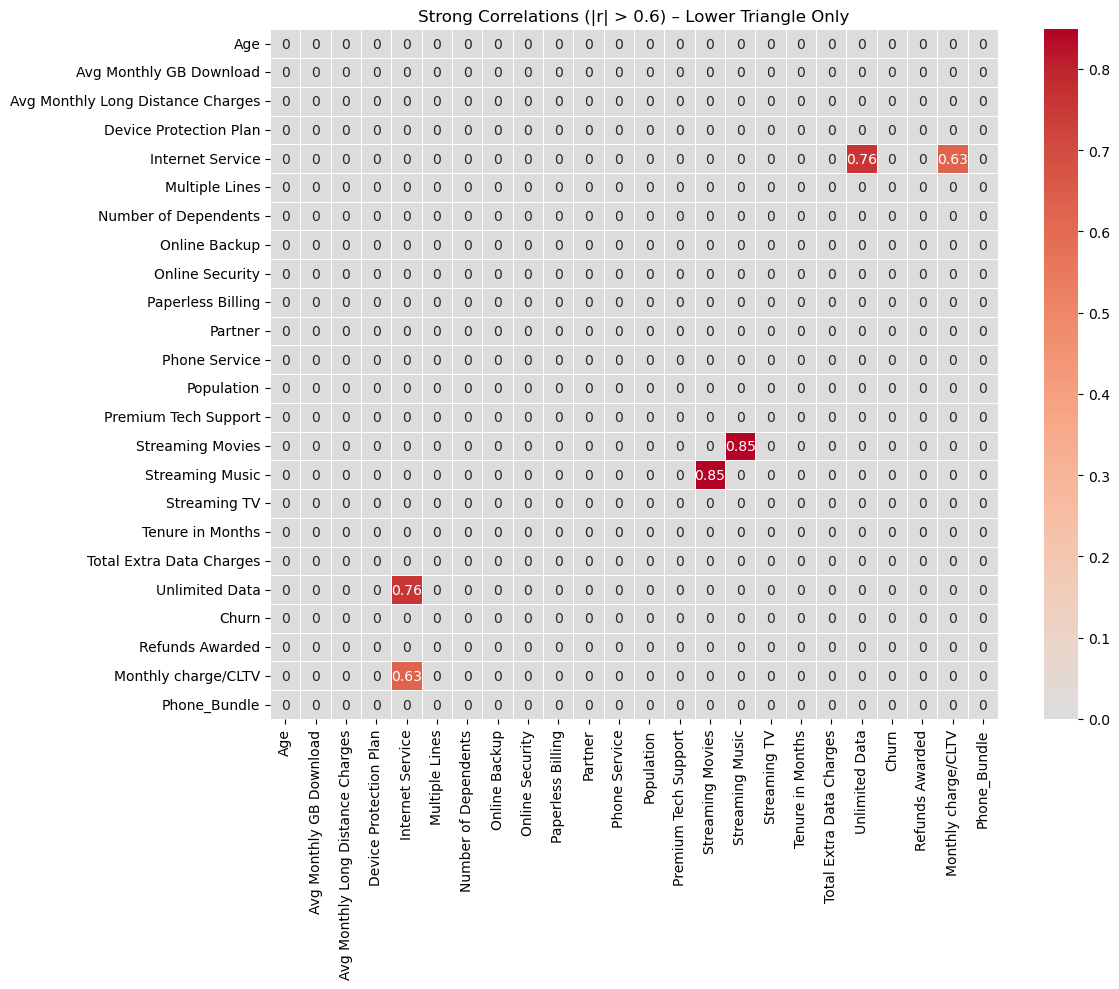

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean.corr(numeric_only=True)

filtered_corr = corr.copy()
filtered_corr[(corr.abs() <= 0.6) | (corr == 1.0)] = 0

mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Strong Correlations (|r| > 0.6) – Lower Triangle Only")
plt.tight_layout()
plt.show()

In [31]:
df_clean['Partner'].unique()

array([1, 0], dtype=int64)

In [32]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
features = df_clean.drop(columns=['Churn'])

binary_cols = [col for col in features.columns 
               if df[col].nunique() == 2 and df[col].dropna().isin([0, 1]).all()]

explicitly_categorical = ['Gender', 'Contract', 'Internet Type', 'Service_Level']
binary_cols = [col for col in binary_cols if col not in explicitly_categorical]

numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in binary_cols + ['Churn']]

In [34]:
categorical_ohe = ['Gender']
ordinal_contract = ['Contract']
ordinal_internet = ['Internet Type']
ordinal_service_level = ['Service_Level']

In [35]:
contract_order = [['Month-to-Month', 'One Year', 'Two Year']]
internet_order = [['None', 'DSL', 'Cable', 'Fiber Optic']]
service_order = [['Low', 'Medium', 'High']]

In [36]:
contract_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=contract_order)),
    ('scaler', StandardScaler())
])

internet_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=internet_order)),
    ('scaler', StandardScaler())
])

service_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=service_order)),
    ('scaler', StandardScaler())
])

In [37]:
preprocessor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_ohe),
    ('contract_ord', contract_pipeline, ordinal_contract),
    ('internet_ord', internet_pipeline, ordinal_internet),
    ('service_ord', service_pipeline, ordinal_service_level),
    ('scaler', StandardScaler(), numeric_cols)
], remainder='passthrough')

In [38]:
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn']

In [39]:
X_transformed = preprocessor.fit_transform(X)

### Preparing csv file for best model to be trained in Sagemaker

In [40]:
print(preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender']),
                                ('contract_ord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Month-to-Month',
                                                                              'One '
                                                                              'Year',
                                                                              'Two '
                                                                              'Year']])),
                                                 ('scaler', StandardScaler())]),
                                 ['Contract']),
                                ('internet_ord',


In [41]:
# change X_transformed to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out(), index=X.index)
X_transformed_df.head()

,ohe__Gender_Female,ohe__Gender_Male,contract_ord__Contract,internet_ord__Internet Type,service_ord__Service_Level,scaler__Age,scaler__Avg Monthly GB Download,scaler__Avg Monthly Long Distance Charges,scaler__Number of Dependents,scaler__Population,...,remainder__Paperless Billing,remainder__Partner,remainder__Phone Service,remainder__Premium Tech Support,remainder__Streaming Movies,remainder__Streaming Music,remainder__Streaming TV,remainder__Unlimited Data,remainder__Refunds Awarded,remainder__Phone_Bundle
0,1.0,0.0,0.289021,-0.628053,0.302288,-0.448364,0.415555,-0.262119,2.629292,-0.982304,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,-0.889657,1.018161,1.487710,1.700997,0.072712,0.681105,-0.486835,-1.044287,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.0,1.467699,1.018161,1.487710,1.223361,-0.319109,-0.841519,-0.486835,-0.755269,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,-0.889657,-0.628053,0.302288,0.029272,-0.661952,0.756201,-0.486835,-1.043483,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.289021,-1.451160,-0.883133,-1.523045,-1.004796,-0.807208,-0.486835,1.284551,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ohe__Gender_Female                         7043 non-null   float64
 1   ohe__Gender_Male                           7043 non-null   float64
 2   contract_ord__Contract                     7043 non-null   float64
 3   internet_ord__Internet Type                7043 non-null   float64
 4   service_ord__Service_Level                 7043 non-null   float64
 5   scaler__Age                                7043 non-null   float64
 6   scaler__Avg Monthly GB Download            7043 non-null   float64
 7   scaler__Avg Monthly Long Distance Charges  7043 non-null   float64
 8   scaler__Number of Dependents               7043 non-null   float64
 9   scaler__Population                         7043 non-null   float64
 10  scaler__Tenure in Months

In [43]:
# concatenate target variable with transformed features as the first column, as df_for_sm
df_for_sm = pd.concat([y, X_transformed_df], axis=1)
df_for_sm.head()

,Churn,ohe__Gender_Female,ohe__Gender_Male,contract_ord__Contract,internet_ord__Internet Type,service_ord__Service_Level,scaler__Age,scaler__Avg Monthly GB Download,scaler__Avg Monthly Long Distance Charges,scaler__Number of Dependents,...,remainder__Paperless Billing,remainder__Partner,remainder__Phone Service,remainder__Premium Tech Support,remainder__Streaming Movies,remainder__Streaming Music,remainder__Streaming TV,remainder__Unlimited Data,remainder__Refunds Awarded,remainder__Phone_Bundle
0,0,1.0,0.0,0.289021,-0.628053,0.302288,-0.448364,0.415555,-0.262119,2.629292,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0.0,1.0,-0.889657,1.018161,1.487710,1.700997,0.072712,0.681105,-0.486835,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0,1.0,0.0,1.467699,1.018161,1.487710,1.223361,-0.319109,-0.841519,-0.486835,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,-0.889657,-0.628053,0.302288,0.029272,-0.661952,0.756201,-0.486835,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1.0,0.0,0.289021,-1.451160,-0.883133,-1.523045,-1.004796,-0.807208,-0.486835,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# save df_for_sm to a CSV file
df_for_sm.to_csv('DATA/df_for_sm.csv', index=False)

## Model Training

### 1. Check Class Distribution

Class distribution:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Class distribution (%):
 Churn
0    73.463013
1    26.536987
Name: count, dtype: float64


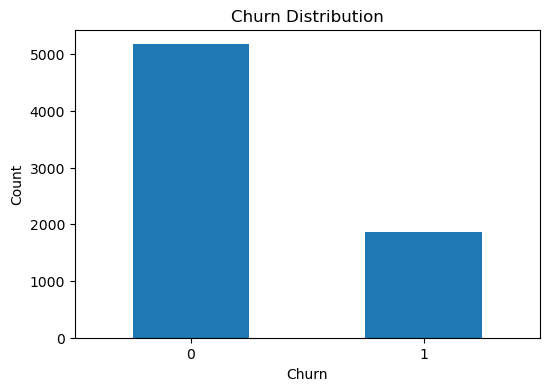

In [45]:
# Check class distribution
import matplotlib.pyplot as plt

class_counts = y.value_counts()
print("Class distribution:\n", class_counts)
print("Class distribution (%):\n", class_counts / len(y) * 100)

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 2. Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

# Split the data using X_transformed (already preprocessed data)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.1, random_state=42, stratify=y # We make test_size = 0.1 to compare with Sagemaker autoset set-size
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution: {y_train.value_counts() / len(y_train)}")
print(f"Test set class distribution: {y_test.value_counts() / len(y_test)}")

Training set shape: (6338, 28)
Test set shape: (705, 28)
Training set class distribution: Churn
0    0.734617
1    0.265383
Name: count, dtype: float64
Test set class distribution: Churn
0    0.734752
1    0.265248
Name: count, dtype: float64


### 3. Handle Class Imbalance if Needed

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Check if we need to handle class imbalance (typically if minority class < 20-25%)
minority_class_percent = (y_train.value_counts() / len(y_train)).min() * 100
print(f"Minority class percentage: {minority_class_percent:.2f}%")

# Apply SMOTE if significant imbalance exists
if minority_class_percent < 25:
    print("Applying SMOTE for class balancing...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    print("Before SMOTE:", Counter(y_train))
    print("After SMOTE:", Counter(y_train_resampled))
    
    # Use the resampled data for training
    X_train = X_train_resampled
    y_train = y_train_resampled
else:
    print("Class distribution is acceptable - not applying resampling")

Minority class percentage: 26.54%
Class distribution is acceptable - not applying resampling


In [48]:
# Since above is ite balanced, we also want to ensure that pos_weight would be balanced later on
# especially when we use XGboost - so we define it here
negative_count = (y_train == 0).sum()
positive_count = (y_train == 1).sum()
scale_pos_weight = negative_count / positive_count
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

# We can use class_weight parameters in other models instead, depending on the outcome of the best model
from collections import Counter
print(f"Class distribution in training set: {Counter(y_train)}")
print(f"Class distribution in test set: {Counter(y_test)}")

Calculated scale_pos_weight: 2.77
Class distribution in training set: Counter({0: 4656, 1: 1682})
Class distribution in test set: Counter({0: 518, 1: 187})


### 4. Define Profit Scoring Function

In [49]:
from sklearn.metrics import confusion_matrix, make_scorer

def profit_scorer(y_true, y_pred, return_cm=False):
    """
    Custom profit scoring function for telco churn:
    - True Positive (correctly identified churner): (saved customer) average CLTV * 60% - CAC (10% of CLTV)
    - False Positive (incorrectly flagged as churner): (cost of acquisition) average CLTV * 10%
    - False Negative (missed churner): (lost customer value) $0
    - True Negative (correctly identified non-churner): $0
    
    Parameters:
    - y_true: actual values
    - y_pred: predicted values
    - return_cm: if True, return confusion matrix values along with profit
    
    Returns:
    - if return_cm=False: profit value only
    - if return_cm=True: (profit, tn, fp, fn, tp)
    """
    # Debug printouts
    print(f"DEBUG - In profit_scorer: Length of y_true: {len(y_true)}, Length of y_pred: {len(y_pred)}")
    
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Print raw confusion matrix for debugging
    print(f"DEBUG - Raw confusion matrix:\n{cm}")
    print(f"DEBUG - Confusion matrix values - TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print(f"DEBUG - Sum of confusion matrix values: {tn + fp + fn + tp}")
        
    # Calculate profit components
    tp_profit = tp * (average_cltv * 0.6 - average_cltv * 0.1)  # 60% of CLTV minus 10% CAC
    fp_cost = fp * (average_cltv * 0.1)  # Cost of acquisition (10% of CLTV)
        
    # Total profit (TN and FN contribute $0)
    profit = tp_profit - fp_cost
        
    if return_cm:
        return profit, tn, fp, fn, tp
    else:
        return profit

# Create scorer for GridSearchCV (this remains unchanged)
profit_scorer_skl = make_scorer(profit_scorer)

### 5. Define Models and Parameter Grids

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Define models to test
models = {
    'logistic': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), # Using balanced class weight
    'random_forest': RandomForestClassifier(random_state=42, class_weight='balanced'), # Using balanced class weight
    'xgboost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                                random_state=42, scale_pos_weight=scale_pos_weight) # Using scale_pos_weight
}


In [51]:
# Define parameter grids for each model
param_grids = {
    'logistic': {
        'C': [0.01, 0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        # No need to search over class_weight since we've set it in the model definition
    },
    'random_forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        # No need to search over class_weight since we've set it in the model definition
    },
    'xgboost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        # No need to search over scale_pos_weight since we've set it in the model definition
    }
}

### 6. Cross-Validation and Model Selection

In [52]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import pandas as pd

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
def train_and_evaluate_model(model_name, model, param_grid):
    print(f"\n---------- Training {model_name} ----------")
    
    # Print the actual size of test set for debugging
    print(f"DEBUG - Test set size before evaluation: {X_test.shape[0]}")
    print(f"DEBUG - Test set target distribution: {y_test.value_counts()}")
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=profit_scorer_skl, # to use once it is defined 
        # scoring='roc_auc',  # Use ROC AUC /recall for model selection because it is a binary classification problem
        n_jobs=-1,
        verbose=1
    )
    
    # Train model
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Get best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best parameters: {best_params}")
    print(f"Best CV score: {best_score}")
    print(f"Training time: {training_time:.2f} seconds")
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # To diagnose the issue, let's calculate the confusion matrix directly here
    direct_cm = confusion_matrix(y_test, y_pred)
    print(f"DEBUG - Direct confusion matrix:\n{direct_cm}")
    print(f"DEBUG - Direct CM sum: {direct_cm.sum()}")
    
    # Calculate profit and get confusion matrix values at the same time
    profit, tn, fp, fn, tp = profit_scorer(y_test, y_pred, return_cm=True)
    
    # Verify that the returned values match the direct calculation
    print(f"DEBUG - Received from profit_scorer - TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print(f"DEBUG - Sum from profit_scorer: {tn + fp + fn + tp}")
    
    # Print results
    print("\nTest Set Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Profit: ${profit:.2f}")
    
    print("\nConfusion Matrix:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return {
        'model_name': model_name,
        'best_model': best_model,
        'best_params': best_params,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'profit': profit,
        'training_time': training_time,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp
    }

In [54]:
# Train and evaluate all models
results = []
for model_name, model in models.items():
    result = train_and_evaluate_model(model_name, model, param_grids[model_name])
    results.append(result)

# Create results dataframe
results_df = pd.DataFrame([
    {key: val for key, val in res.items() if key != 'best_model' and key != 'best_params'} 
    for res in results
])


---------- Training logistic ----------
DEBUG - Test set size before evaluation: 705
DEBUG - Test set target distribution: Churn
0    518
1    187
Name: count, dtype: int64
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 512458.4435865398
Training time: 12.45 seconds
DEBUG - Direct confusion matrix:
[[387 131]
 [ 38 149]]
DEBUG - Direct CM sum: 705
DEBUG - In profit_scorer: Length of y_true: 705, Length of y_pred: 705
DEBUG - Raw confusion matrix:
[[387 131]
 [ 38 149]]
DEBUG - Confusion matrix values - TN: 387, FP: 131, FN: 38, TP: 149
DEBUG - Sum of confusion matrix values: 705
DEBUG - Received from profit_scorer - TN: 387, FP: 131, FN: 38, TP: 149
DEBUG - Sum from profit_scorer: 705

Test Set Results:
Accuracy: 0.7603
Precision: 0.5321
Recall: 0.7968
F1 Score: 0.6381
ROC AUC: 0.8703
Profit: $270178.16

Confusion Matrix:
True Negatives: 387
False Positives: 131
False Negatives: 38
True Po

c:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV score: 517386.7748317478
Training time: 21.85 seconds
DEBUG - Direct confusion matrix:
[[404 114]
 [ 32 155]]
DEBUG - Direct CM sum: 705
DEBUG - In profit_scorer: Length of y_true: 705, Length of y_pred: 705
DEBUG - Raw confusion matrix:
[[404 114]
 [ 32 155]]
DEBUG - Confusion matrix values - TN: 404, FP: 114, FN: 32, TP: 155
DEBUG - Sum of confusion matrix values: 705
DEBUG - Received from profit_scorer - TN: 404, FP: 114, FN: 32, TP: 155
DEBUG - Sum from profit_scorer: 705

Test Set Results:
Accuracy: 0.7929
Precision: 0.5762
Recall: 0.8289
F1 Score: 0.6798
ROC AUC: 0.8901
Profit: $290859.55

Confusion Matrix:
True Negatives: 404
False Positives: 114
False Negatives: 32
True Positives: 155


c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [55]:
# Sort by ROC AUC
results_df = results_df.sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
print("\n------Model Comparison Results------")
results_df


------Model Comparison Results------


,model_name,accuracy,precision,recall,f1,roc_auc,profit,training_time,true_negatives,false_positives,false_negatives,true_positives
0,random_forest,0.818440,0.629956,0.764706,0.690821,0.894669,277658.662118,17.790668,434,84,44,143
1,xgboost,0.792908,0.576208,0.828877,0.679825,0.890054,290859.549382,21.849385,404,114,32,155
2,logistic,0.760284,0.532143,0.796791,0.638116,0.870316,270178.159336,12.453740,387,131,38,149


Diagnostic check:

In [56]:
# After running all models, add this diagnostic check
print("\n---------- Diagnostic Summary ----------")
print(f"Total test set size: {X_test.shape[0]}")
print(f"Test set distribution: {y_test.value_counts()}")

# Add a function to calculate confusion matrix directly
def calculate_direct_cm(result):
    model_name = result['model_name']
    best_model = result['best_model']
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nDirect confusion matrix for {model_name}:")
    print(cm)
    print(f"Sum: {cm.sum()}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print(f"From results_df - TN: {result['true_negatives']}, FP: {result['false_positives']}, "
          f"FN: {result['false_negatives']}, TP: {result['true_positives']}")
    
    # Check if the values are doubled
    ratio_tn = result['true_negatives'] / tn if tn > 0 else 0
    ratio_fp = result['false_positives'] / fp if fp > 0 else 0
    ratio_fn = result['false_negatives'] / fn if fn > 0 else 0
    ratio_tp = result['true_positives'] / tp if tp > 0 else 0
    
    print(f"Ratio (results/direct) - TN: {ratio_tn:.2f}, FP: {ratio_fp:.2f}, FN: {ratio_fn:.2f}, TP: {ratio_tp:.2f}")

# Call the diagnostic function for each result
for result in results:
    calculate_direct_cm(result)


---------- Diagnostic Summary ----------
Total test set size: 705
Test set distribution: Churn
0    518
1    187
Name: count, dtype: int64

Direct confusion matrix for logistic:
[[387 131]
 [ 38 149]]
Sum: 705
TN: 387, FP: 131, FN: 38, TP: 149
From results_df - TN: 387, FP: 131, FN: 38, TP: 149
Ratio (results/direct) - TN: 1.00, FP: 1.00, FN: 1.00, TP: 1.00

Direct confusion matrix for random_forest:
[[434  84]
 [ 44 143]]
Sum: 705
TN: 434, FP: 84, FN: 44, TP: 143
From results_df - TN: 434, FP: 84, FN: 44, TP: 143
Ratio (results/direct) - TN: 1.00, FP: 1.00, FN: 1.00, TP: 1.00

Direct confusion matrix for xgboost:
[[404 114]
 [ 32 155]]
Sum: 705
TN: 404, FP: 114, FN: 32, TP: 155
From results_df - TN: 404, FP: 114, FN: 32, TP: 155
Ratio (results/direct) - TN: 1.00, FP: 1.00, FN: 1.00, TP: 1.00


Sort by profit - use this as profit will be defined as a column in the results_df

In [57]:
# Uncomment when profit_scorer is defined
results_df = results_df.sort_values('profit', ascending=False)
print("\n---------- Model Comparison ----------")
results_df[['model_name', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'profit', 'training_time']]


---------- Model Comparison ----------


,model_name,accuracy,precision,recall,f1,roc_auc,profit,training_time
1,xgboost,0.792908,0.576208,0.828877,0.679825,0.890054,290859.549382,21.849385
0,random_forest,0.818440,0.629956,0.764706,0.690821,0.894669,277658.662118,17.790668
2,logistic,0.760284,0.532143,0.796791,0.638116,0.870316,270178.159336,12.453740


### 7. Best Model Analysis and Feature Importance

In [58]:
results

[{'model_name': 'logistic',
  'best_model': LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                     random_state=42, solver='liblinear'),
  'best_params': {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
  'accuracy': 0.7602836879432624,
  'precision': 0.5321428571428571,
  'recall': 0.7967914438502673,
  'f1': 0.6381156316916489,
  'roc_auc': 0.8703156938451057,
  'profit': 270178.15933551046,
  'training_time': 12.453739881515503,
  'true_negatives': 387,
  'false_positives': 131,
  'false_negatives': 38,
  'true_positives': 149},
 {'model_name': 'random_forest',
  'best_model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                         min_samples_split=10, random_state=42),
  'best_params': {'max_depth': 10,
   'min_samples_split': 10,
   'n_estimators': 100},
  'accuracy': 0.8184397163120567,
  'precision': 0.6299559471365639,
  'recall': 0.7647058823529411,
  'f1': 0.6908212560386473,
  'roc_auc': 0.89466

In [59]:
# Select the best model - with profit_scorer
best_model_info = max(results, key=lambda x: x['profit']) #roc_auc if no profit_scorer is defined
best_model_name = best_model_info['model_name']
best_model = best_model_info['best_model']

print(f"\n---------- Best Model: {best_model_name} ----------")
print(f"Best parameters: {best_model_info['best_params']}")
print(f"Profit: ${best_model_info['profit']:.2f}")
print(f"Accuracy: {best_model_info['accuracy']:.4f}")
print(f"Precision: {best_model_info['precision']:.4f}")
print(f"Recall: {best_model_info['recall']:.4f}")
print(f"F1 Score: {best_model_info['f1']:.4f}")
print(f"ROC AUC: {best_model_info['roc_auc']:.4f}")



---------- Best Model: xgboost ----------
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Profit: $290859.55
Accuracy: 0.7929
Precision: 0.5762
Recall: 0.8289
F1 Score: 0.6798
ROC AUC: 0.8901


### 8. Feature importances


Top 10 Most Important Features:
                         Feature  Importance
2         contract_ord__Contract    0.326167
3    internet_ord__Internet Type    0.097911
8   scaler__Number of Dependents    0.080568
22   remainder__Streaming Movies    0.051243
18  remainder__Paperless Billing    0.051003
5                    scaler__Age    0.039382
10      scaler__Tenure in Months    0.035201
17    remainder__Online Security    0.033195
20      remainder__Phone Service    0.030525
24       remainder__Streaming TV    0.029566


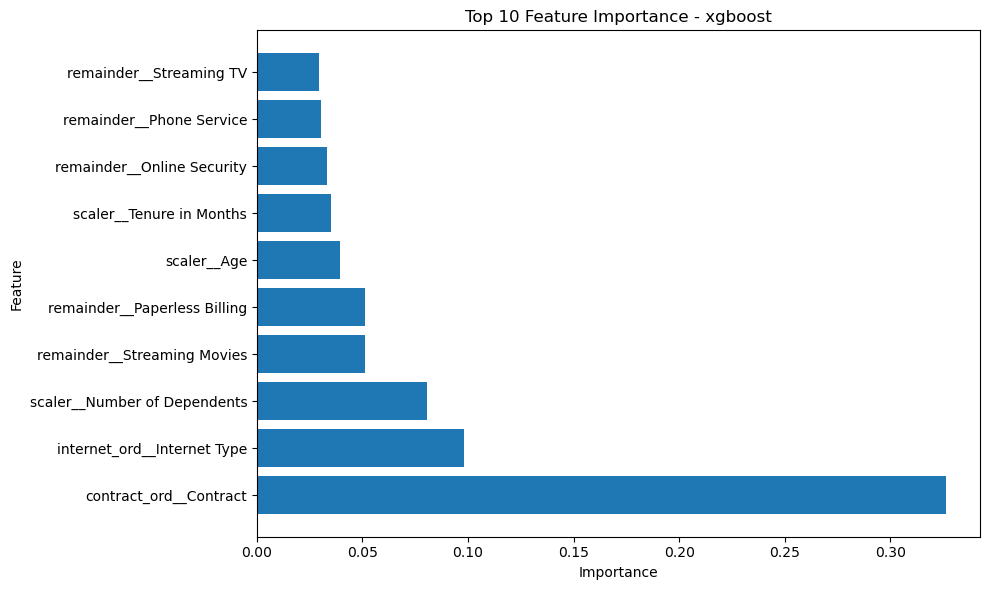

In [60]:
# Extract feature importance if best_model supports it
if best_model_name in ['random_forest', 'xgboost']:
    # Get feature importances from tree-based models
    importances = best_model.feature_importances_
    
    # Get the actual feature names from your preprocessor
    # Assuming X_train has the transformed feature names in the right order
    if hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    else:
        # Fall back to column names from your original dataset if the above doesn't work
        # This assumes your features are in the same order as in the original dataset
        feature_names = X_train.columns.tolist()
    
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
elif best_model_name == 'logistic':
    # For logistic regression, use the absolute values of coefficients
    importances = np.abs(best_model.coef_[0])
    
    # Same approach for feature names
    if hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    else:
        feature_names = X_train.columns.tolist()
    
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

# Display feature importance
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.title(f'Top 10 Feature Importance - {best_model_name}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 9. ROC Curve visualization

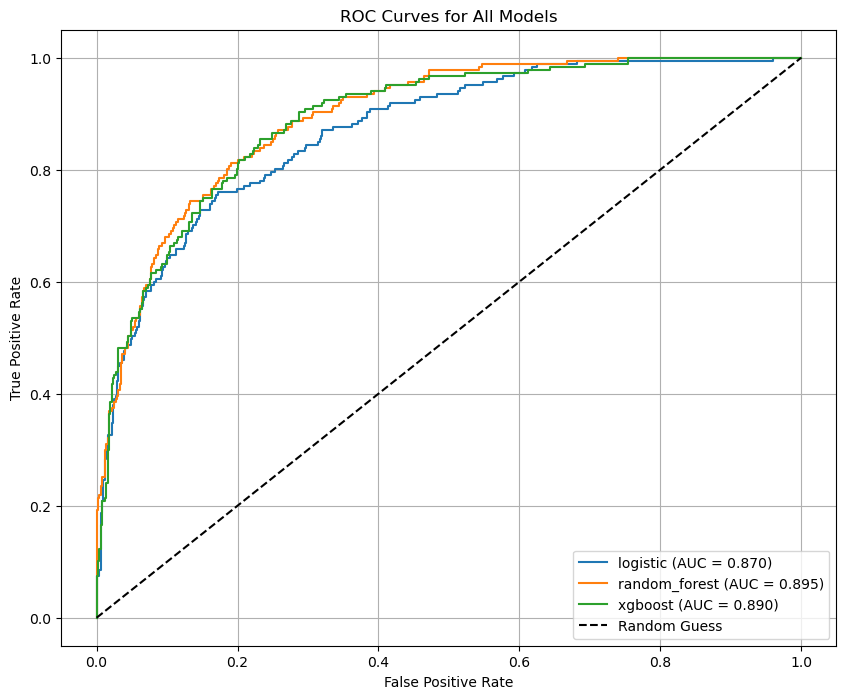

In [61]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for result in results:
    model = result['best_model']
    model_name = result['model_name']
    
    # Get prediction probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Add random guess line    
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 10. Threshold Optimization
Put into python cell when profit is available

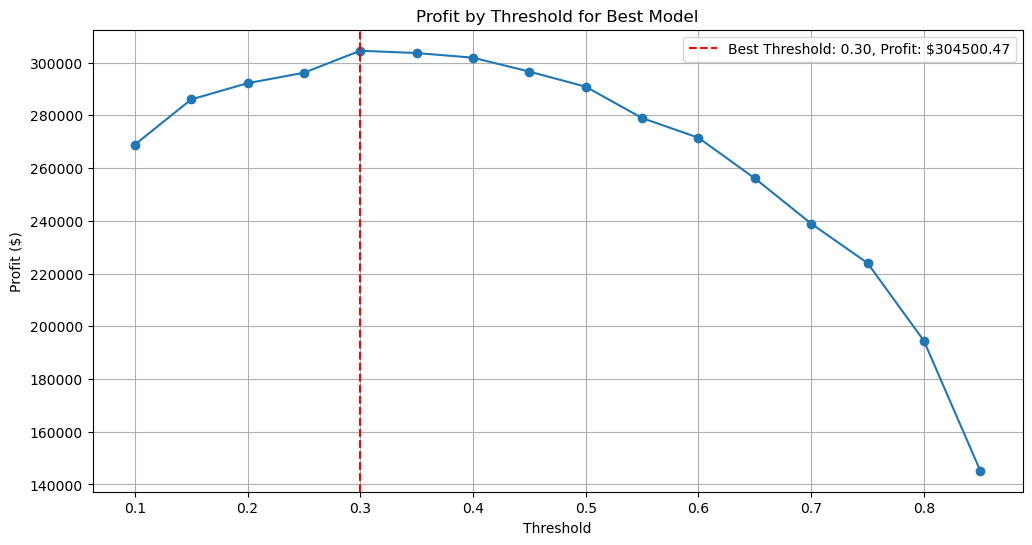

Optimized threshold: 0.30
Profit with optimized threshold: $304500.47


In [62]:
## Optimize decision threshold for the best model
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5  # Default
best_profit = float('-inf')

plt.figure(figsize=(12, 6))
profits = []

for threshold in thresholds:
    # Apply threshold to best model predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    
    # Calculate profit using your original function logic
    tp_profit = tp * (average_cltv * 0.6 - average_cltv * 0.1)  # 60% of CLTV minus 10% CAC
    fp_cost = fp * (average_cltv * 0.1)  # Cost of acquisition (10% of CLTV)
    
    # Total profit (TN and FN contribute $0)
    profit = tp_profit - fp_cost
    
    profits.append(profit)
    
    # Update best threshold if profit is improved
    if profit > best_profit:
        best_profit = profit
        best_threshold = threshold

plt.plot(thresholds, profits, marker='o')
plt.axvline(x=best_threshold, color='r', linestyle='--', 
            label=f'Best Threshold: {best_threshold:.2f}, Profit: ${best_profit:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Profit ($)')
plt.title('Profit by Threshold for Best Model')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimized threshold: {best_threshold:.2f}")
print(f"Profit with optimized threshold: ${best_profit:.2f}")

In [63]:
# store best_threshold into a pickle file to import into the next notebook
import pickle

with open('./DATA/best_threshold.pkl', 'wb') as f:
    pickle.dump(best_threshold, f)